Importing the Libraries

In [4]:
import sys
sys.path.append('../utils')
import warnings
warnings.filterwarnings('ignore')

import os
import time 
import copy 
import re

from sklearn import datasets
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np 

import model_functions
import model_utils
import plotting_utils
import scoring_utils

Load in Sample Data

In [5]:
housing_prices = datasets.load_boston()
X = housing_prices.data
y = housing_prices.target

In [3]:
type(y)

numpy.ndarray

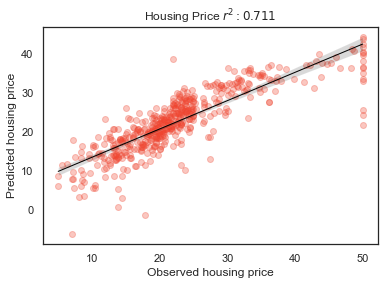

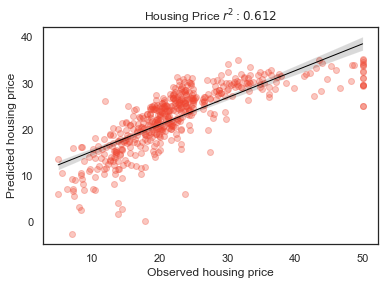

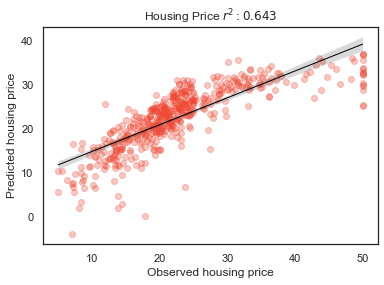

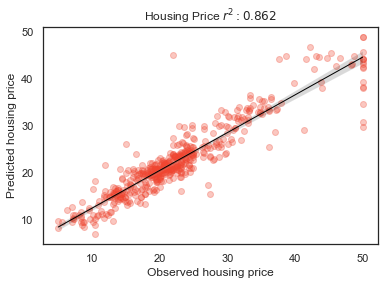

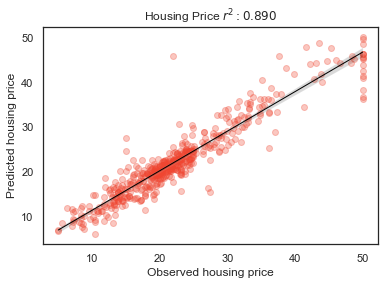

In [8]:
model_types = ['ridge', 'lasso', 'elastic_net', 'random_forest', 'xgboost']
for _ in model_types:
    model = model_utils.get_model(_)
    param_grid = model_utils.get_param_grid(_)
    cv, nested_scores, y, y_pred = model_utils.nested_cross_validation(model, X, y, param_grid)
    model_utils.plot_cross_val_results(y, y_pred, 'Housing Price', nested_scores)


### Internet Data Test

In [ ]:
X = housing_prices.data
y = housing_prices.target

In [49]:
internet_data_dir = '../data/internet/'
ndhs_data_dir = '../data/ndhs/'
ntl_data_dir = '../data/nightlights/'

dhs_indicators_path = ndhs_data_dir + 'dhs_indicators.csv'
ntl_summary_stats_path = ntl_data_dir + 'nightlights_summary_stats.csv'

dlspeed_summary_stats_path = internet_data_dir + 'summary_stats/imputed_download_speeds_summary_stats.csv'
ulspeed_summary_stats_path = internet_data_dir + 'summary_stats/imputed_upload_speeds_summary_stats.csv'
latency_summary_stats_path = internet_data_dir + 'summary_stats/imputed_latency_summary_stats.csv'

In [64]:
dlspeed_summary_stats = pd.read_csv(dlspeed_summary_stats_path).drop('Unnamed: 0', 1)
ulspeed_summary_stats = pd.read_csv(ulspeed_summary_stats_path).drop('Unnamed: 0', 1)
latency_summary_stats = pd.read_csv(latency_summary_stats_path).drop('Unnamed: 0', 1)
ntl_summary_stats = pd.read_csv(ntl_summary_stats_path)

dhs_indicators = pd.read_csv(dhs_indicators_path)
dlspeeds = dlspeed_summary_stats.merge(dhs_indicators, left_on='DHS Cluster Number', right_on='cluster_number')
ulspeeds = ulspeed_summary_stats.merge(dhs_indicators, left_on='DHS Cluster Number', right_on='cluster_number')
latency = latency_summary_stats.merge(dhs_indicators, left_on='DHS Cluster Number', right_on='cluster_number')


# Define feature columns
feature_cols_internet = ['Mean', 'Maximum', 'Minimum', 'Standard Deviation', 'Median', 'Skew', 'Coefficient of Variation', 'Kurtosis']
feature_cols_nightlights = ['ntl_cov', 'ntl_kurtosis', 'ntl_max', 'ntl_mean', 'ntl_median','ntl_min', 'ntl_skewness', 'ntl_std']
feature_cols_internet_and_nightlights = feature_cols_internet + feature_cols_nightlights


### Download Speed Only Predicting Wealth Index

Model Type : ridge


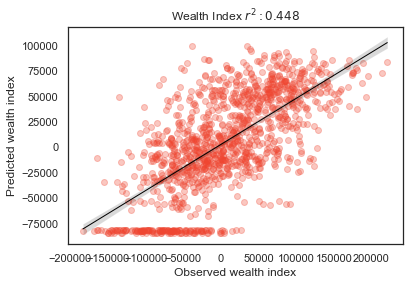

Model Type : lasso


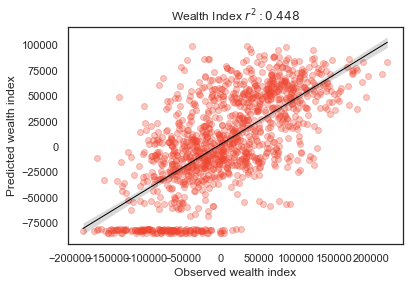

Model Type : elastic_net


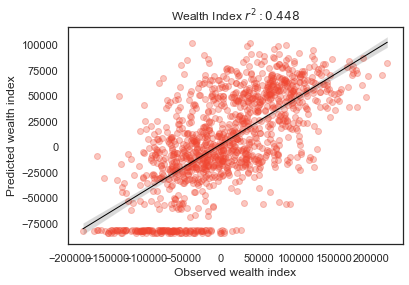

Model Type : random_forest


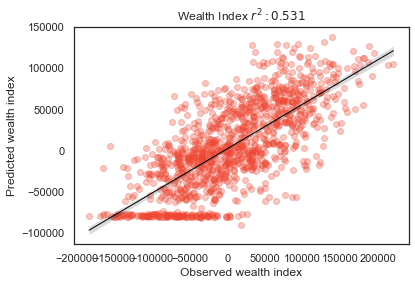

Model Type : xgboost


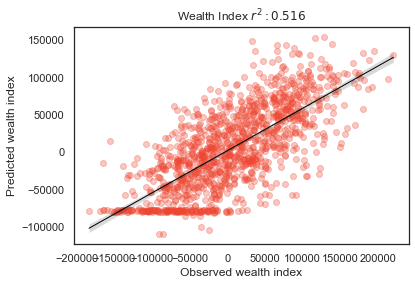

In [36]:
X = dlspeeds[feature_cols_internet]
y = dlspeeds['wealth_index']

model_types = ['ridge', 'lasso', 'elastic_net', 'random_forest', 'xgboost']
for _ in model_types:
    print('Model Type : {}'.format(_))
    model = model_utils.get_model(_)
    param_grid = model_utils.get_param_grid(_)
    cv, nested_scores, y, y_pred = model_utils.nested_cross_validation(model, X, y, param_grid)
    model_utils.plot_cross_val_results(y, y_pred, 'Wealth Index', nested_scores)

### Upload Speeds Only Predicting Wealth Index

Model Type : ridge


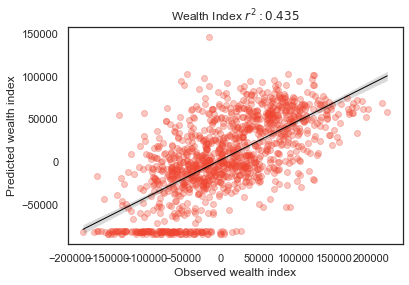

Model Type : lasso


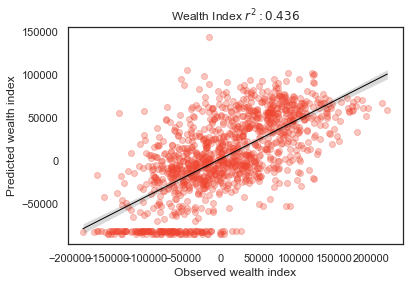

Model Type : elastic_net


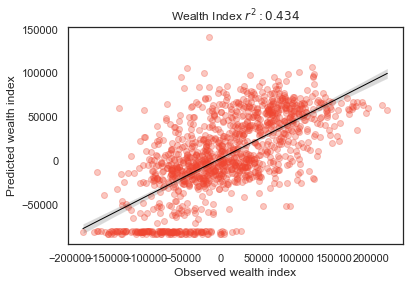

Model Type : random_forest


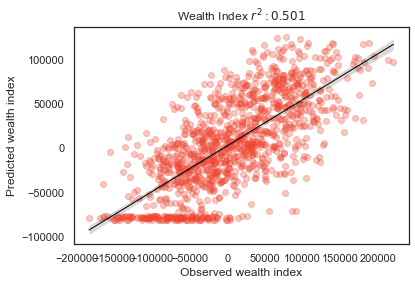

Model Type : xgboost


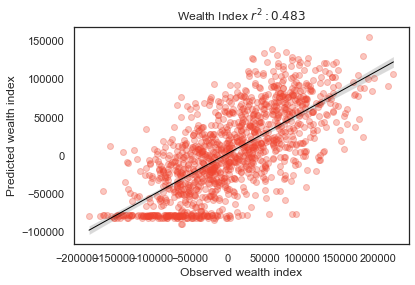

In [38]:
X = ulspeeds[feature_cols_internet]
y = ulspeeds['wealth_index']

model_types = ['ridge', 'lasso', 'elastic_net', 'random_forest', 'xgboost']
for _ in model_types:
    print('Model Type : {}'.format(_))
    model = model_utils.get_model(_)
    param_grid = model_utils.get_param_grid(_)
    cv, nested_scores, y, y_pred = model_utils.nested_cross_validation(model, X, y, param_grid)
    model_utils.plot_cross_val_results(y, y_pred, 'Wealth Index', nested_scores)

### Latency Only Predicting Wealth Index

Model Type : ridge


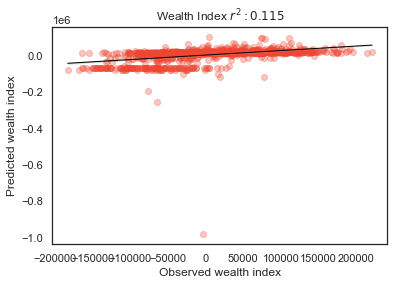

Model Type : lasso


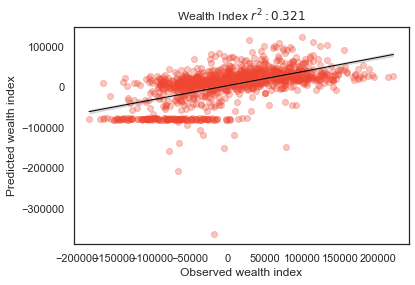

Model Type : elastic_net


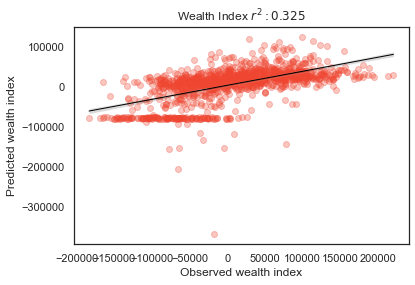

Model Type : random_forest


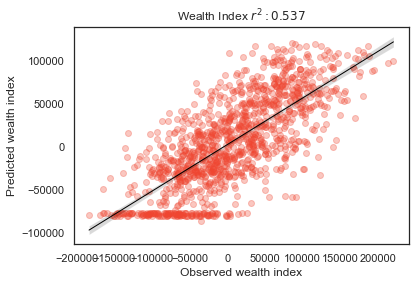

Model Type : xgboost


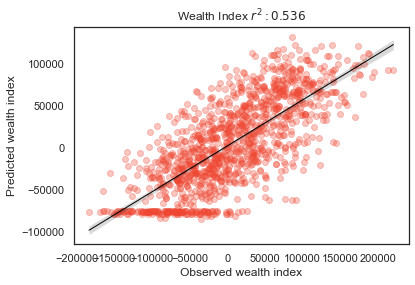

In [39]:
X = latency[feature_cols_internet]
y = latency['wealth_index']

model_types = ['ridge', 'lasso', 'elastic_net', 'random_forest', 'xgboost']
for _ in model_types:
    print('Model Type : {}'.format(_))
    model = model_utils.get_model(_)
    param_grid = model_utils.get_param_grid(_)
    cv, nested_scores, y, y_pred = model_utils.nested_cross_validation(model, X, y, param_grid)
    model_utils.plot_cross_val_results(y, y_pred, 'Wealth Index', nested_scores)

### Download Speed and Nightlights Predicting Wealth Index

Model Type : ridge


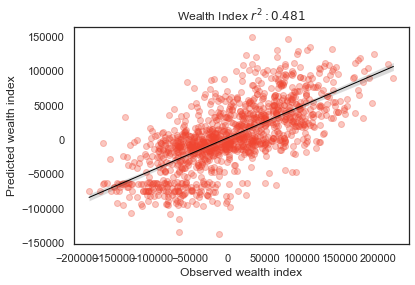

Model Type : lasso


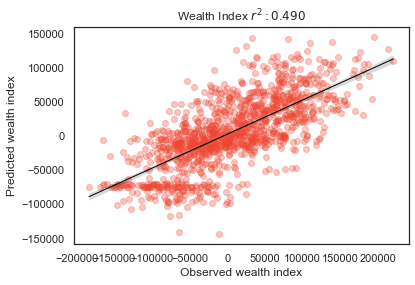

Model Type : elastic_net


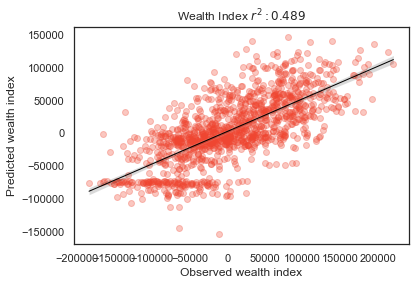

Model Type : random_forest


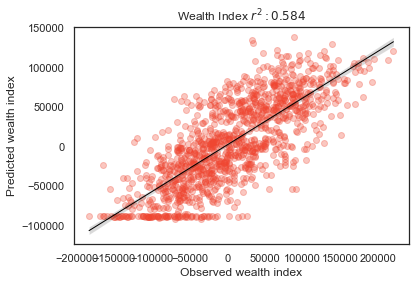

Model Type : xgboost


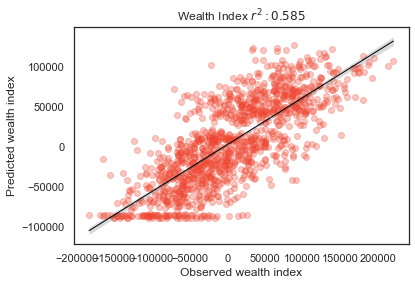

In [67]:
ntl_summary_stats.columns = ['DHSCLUST', 'ntl_cov', 'ntl_kurtosis', 'ntl_max', 'ntl_mean', 'ntl_median','ntl_min', 'ntl_skewness', 'ntl_std']
dl_ntl = dlspeeds.merge(ntl_summary_stats, left_on='DHS Cluster Number', right_on='DHSCLUST')


X = dl_ntl[feature_cols_internet_and_nightlights]
y = dl_ntl['wealth_index']

model_types = ['ridge', 'lasso', 'elastic_net', 'random_forest', 'xgboost']
for _ in model_types:
    print('Model Type : {}'.format(_))
    model = model_utils.get_model(_)
    param_grid = model_utils.get_param_grid(_)
    cv, nested_scores, y, y_pred = model_utils.nested_cross_validation(model, X, y, param_grid)
    model_utils.plot_cross_val_results(y, y_pred, 'Wealth Index', nested_scores)

### Upload Speed and Nightlights Predicting Wealth Index

In [ ]:
ntl_summary_stats.columns = ['DHSCLUST', 'ntl_cov', 'ntl_kurtosis', 'ntl_max', 'ntl_mean', 'ntl_median','ntl_min', 'ntl_skewness', 'ntl_std']
ul_ntl = ulspeeds.merge(ntl_summary_stats, left_on='DHS Cluster Number', right_on='DHSCLUST')

X = ul_ntl[feature_cols_internet_and_nightlights]
y = ul_ntl['wealth_index']

model_types = ['ridge', 'lasso', 'elastic_net', 'random_forest', 'xgboost']
for _ in model_types:
    print('Model Type : {}'.format(_))
    model = model_utils.get_model(_)
    param_grid = model_utils.get_param_grid(_)
    cv, nested_scores, y, y_pred = model_utils.nested_cross_validation(model, X, y, param_grid)
    model_utils.plot_cross_val_results(y, y_pred, 'Wealth Index', nested_scores)


### Download Speed, Nightlights, and OSM Predicting Wealth Index

In [68]:
osm_roads_file = '../data/osm/osm_roads.csv'
osm_buildings_file = '../data/osm/osm_buildings.csv'
osm_pois_file = '../data/osm/osm_pois.csv'

In [69]:
roads = pd.read_csv(osm_roads_file)
buildings = pd.read_csv(osm_buildings_file)
pois = pd.read_csv(osm_pois_file)

road_cols = roads.columns[1:]
building_cols = buildings.columns[1:]
poi_cols = pois.columns[1:]

osm_cols = list(road_cols) + list(building_cols) + list(poi_cols)
osm_ntl_internet_cols = list(osm_cols) + feature_cols_internet_and_nightlights

In [71]:
osm = roads.merge(buildings, on='DHSCLUST')
osm = osm.merge(pois, on='DHSCLUST')
osm_ntl_dl = osm.merge(dl_ntl, left_on='DHSCLUST', right_on='DHS Cluster Number')

Model Type : ridge


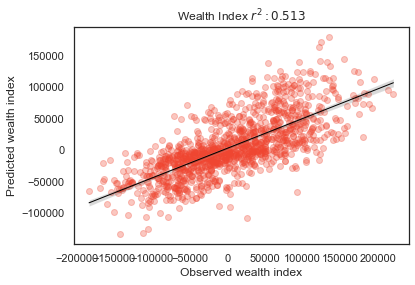

Model Type : lasso


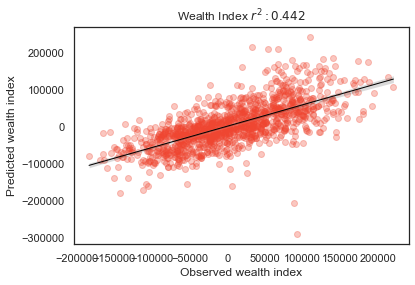

Model Type : elastic_net


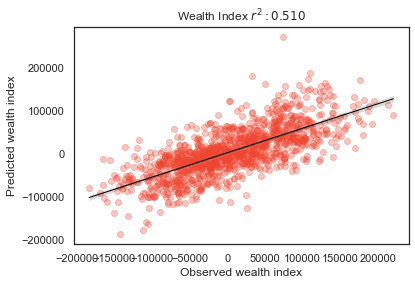

In [74]:
X = osm_ntl_dl[osm_ntl_internet_cols]
y = osm_ntl_dl['wealth_index']

model_types = ['ridge', 'lasso', 'elastic_net']#['ridge', 'lasso', 'elastic_net', 'random_forest', 'xgboost']
for _ in model_types:
    print('Model Type : {}'.format(_))
    model = model_utils.get_model(_)
    param_grid = model_utils.get_param_grid(_)
    cv, nested_scores, y, y_pred = model_utils.nested_cross_validation(model, X, y, param_grid)
    model_utils.plot_cross_val_results(y, y_pred, 'Wealth Index', nested_scores)

In [75]:
X = osm_ntl_dl[osm_ntl_internet_cols]
y = osm_ntl_dl['wealth_index']

model_types = ['random_forest']#['ridge', 'lasso', 'elastic_net', 'random_forest', 'xgboost']
for _ in model_types:
    print('Model Type : {}'.format(_))
    model = model_utils.get_model(_)
    param_grid = model_utils.get_param_grid(_)
    cv, nested_scores, y, y_pred = model_utils.nested_cross_validation(model, X, y, param_grid)
    model_utils.plot_cross_val_results(y, y_pred, 'Wealth Index', nested_scores)

Model Type : random_forest
